features: tensor([0.1996, 1.2788]) 
label: tensor([0.2452])
tensor([[ 1.0972,  1.0322],
        [-0.5700, -0.8449],
        [ 0.7348, -1.0085],
        [-0.8794, -0.1888],
        [-0.7545, -0.1494],
        [ 0.1660,  0.2460],
        [-0.5200, -1.2054],
        [ 0.3221, -3.4632],
        [-1.2380,  0.2373],
        [ 0.2843, -0.1998]]) 
 tensor([[ 2.8724],
        [ 5.9438],
        [ 9.0834],
        [ 3.0707],
        [ 3.2052],
        [ 3.6926],
        [ 7.2644],
        [16.6214],
        [ 0.9183],
        [ 5.4491]])
epoch 1, loss 0.031016
error in estimating w: tensor([ 0.0460, -0.1444], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.1945], grad_fn=<RsubBackward1>)


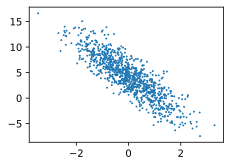

In [6]:
%matplotlib inline
import torch
import random
from d2l import torch as d2l

def synthetic_data(w, b, num_examples):  #@save
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0],'\nlabel:', labels[0])

d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break
    
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            
lr = 0.03
num_epochs = 1
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')